In [6]:
pip install -U stanza

Note: you may need to restart the kernel to use updated packages.


In [7]:
import os
import re
import nltk
from nltk import word_tokenize , sent_tokenize , pos_tag
from tdmh import *
from os.path import join
import stanza
import sys

In [8]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('wordnet')
nltk.download('sentiwordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\RS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\RS\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\RS\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


True

In [9]:
texts = []
dir = r'Corpus'
files = []

for entry in os.listdir(dir):
    # dir + subdirectory
    path = os.path.join(dir,entry)
    if os.path.isdir(path):
        
        for file in os.listdir(path):
            # dir + subdirectory + file 
            file_path = join(path,file)
            texts.append( file_path )
            if re.search( r'txt$' , file_path ):
                print( file_path )
                files.append(file_path)

Corpus\Alberto_Caeiro\TDM_AC_IX_Guardador_de_Rebanhos.txt
Corpus\Alberto_Caeiro\TDM_AC_V_Guardador_de_Rebanhos.txt
Corpus\Fernando_Pessoa\TDM_FP_Autopsicografia.txt
Corpus\Fernando_Pessoa\TDM_FP_GatoQueBrincasNaRua.txt
Corpus\Fernando_Pessoa\TDM_FP_Isto.txt
Corpus\Fernando_Pessoa\TDM_FP_QuandoAsCriançasBrincam.txt
Corpus\Fernando_Pessoa\TDM_FP_QuandoEraCriança.txt
Corpus\Ricardo_Reis\TDM_RR_PrefiroRosasMeuAmorÀPátria.txt
Corpus\Ricardo_Reis\TDM_RR_SobALeveTutela.txt
Corpus\Ricardo_Reis\TDM_RR_UnsComOsOlhosPostosNoPassado.txt
Corpus\Álvaro_de_Campos\TDM_AdC_OdeTriunfal.txt
Corpus\Álvaro_de_Campos\TDM_AdC_Tabacaria.txt


In [10]:
stanza.download('pt')       
nlp = stanza.Pipeline('pt')

def get_title(path):
    title = os.path.basename(path)
    if re.search( r'txt$' , title ):
        # Remove txt extension
        title = title[ :title.index('.txt') ]
        # remove commas and dots
        title = re.sub( r'[.,]' , '' , title )
    return title

2022-04-12 10:17:11 INFO: Downloading default packages for language: pt (Portuguese)...
2022-04-12 10:17:12 INFO: File exists: C:\Users\RS\stanza_resources\pt\default.zip.
2022-04-12 10:17:14 INFO: Finished downloading models and saved to C:\Users\RS\stanza_resources.
2022-04-12 10:17:14 INFO: Loading these models for language: pt (Portuguese):
| Processor | Package |
-----------------------
| tokenize  | bosque  |
| mwt       | bosque  |
| pos       | bosque  |
| lemma     | bosque  |
| depparse  | bosque  |

2022-04-12 10:17:14 INFO: Use device: cpu
2022-04-12 10:17:14 INFO: Loading: tokenize
2022-04-12 10:17:14 INFO: Loading: mwt
2022-04-12 10:17:14 INFO: Loading: pos
2022-04-12 10:17:15 INFO: Loading: lemma
2022-04-12 10:17:15 INFO: Loading: depparse
2022-04-12 10:17:16 INFO: Done loading processors!


In [11]:
from tdmh import *
import re
from nltk.tokenize import word_tokenize

def remove_punctuation(words):
    new_list= []
    for w in words:
        if w.isalnum():
            new_list.append( w )
    return new_list

out = open( 'data.csv' , 'w' , encoding='utf-8' )
out.write('title,heteronym,tokens,types,adjectives,adverbs,verbs,nouns\n')

pos_tags = ['ADJ' , 'ADV' , 'VERB' , 'NOUN']


for text in files:
    freq_vocabulary = dict()
    freq_pos = dict()
    tagged_words = dict()

    print( f'Analysing {get_title(text)} ... ')

    path = os.path.normpath(text)
    parts = path.split(os.sep)
    heteronym = parts[1].strip()
    print( f'Heteronym: {heteronym}')
    
    with open( text , encoding = 'utf-8') as poem:
        full_text = poem.read()
        nr_sentences =  0
        nr_tokens = 0 
        
        doc = nlp(full_text)
    
        for sent in doc.sentences:
            nr_sentences += 1
               
            for word in sent.words:
                
                nr_tokens += 1
                word.text = word.text.lower()
                tagged_words[word.text] = word.upos
                freq_pos[ word.upos ] = freq_pos.get( word.upos ,0) +1
                freq_vocabulary[word.text] = freq_vocabulary.get(word.text,0) + 1
        
        words = list(freq_vocabulary.keys())
        words = remove_punctuation(words)
        print(f'The poem has {nr_tokens} words in total:')
        print(f'The poem has {len(words)} unique words (types):')
        print(words)
        
        print(f"There are { freq_pos.get('ADJ',0) } adjectives:")
        for word in tagged_words:
            if tagged_words[word] == 'ADJ':
                print( word )
        print(f"There are { freq_pos.get('ADV',0) } adverbs:")
        for word in tagged_words:
            if tagged_words[word] == 'ADV':
                print( word )
                
        print('\n\n')
        
        out.write(f"{get_title(text)},{heteronym},{nr_tokens}," )
        out.write(f"{len(words)},{freq_pos.get('ADJ',0)/nr_tokens}," )
        out.write(f"{freq_pos.get('ADV',0)/nr_tokens},")
        out.write(f"{freq_pos.get('VERB',0)/nr_tokens},{freq_pos.get('NOUN',0)/nr_tokens}")
        out.write('\n')
        
out.close()    
        

print('Done!')

Analysing TDM_AC_IX_Guardador_de_Rebanhos ... 
Heteronym: Alberto_Caeiro


C:\Users\RS\anaconda3\lib\site-packages\stanza\models\common\beam.py:86: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  prevK = bestScoresId // numWords


The poem has 111 words in total:
The poem has 62 unique words (types):
['sou', 'um', 'guardador', 'de', 'rebanhos', 'o', 'rebanho', 'é', 'os', 'meus', 'pensamentos', 'e', 'são', 'todos', 'sensações', 'penso', 'com', 'olhos', 'ouvidos', 'as', 'mãos', 'pés', 'nariz', 'a', 'boca', 'pensar', 'uma', 'flor', 'vê', 'lla', 'cheirá', 'la', 'comer', 'fruto', 'saber', 'lhe', 'sentido', 'por', 'isso', 'quando', 'em', 'dia', 'calor', 'me', 'sinto', 'triste', 'gozá', 'lo', 'tanto', 'deito', 'comprido', 'erva', 'fecho', 'quentes', 'todo', 'meu', 'corpo', 'deitado', 'realidade', 'sei', 'verdade', 'feliz']
There are 3 adjectives:
triste
quentes
feliz
There are 2 adverbs:
quando
tanto



Analysing TDM_AC_V_Guardador_de_Rebanhos ... 
Heteronym: Alberto_Caeiro
The poem has 700 words in total:
The poem has 187 unique words (types):
['há', 'metafísica', 'bastante', 'em', 'não', 'pensar', 'nada', 'o', 'que', 'penso', 'eu', 'de', 'mundo', 'sei', 'lá', 'se', 'adoecesse', 'pensaria', 'isso', 'ideia', 'tenho', '

The poem has 1782 words in total:
The poem has 569 unique words (types):
['não', 'sou', 'nada', 'nunca', 'serei', 'posso', 'querer', 'ser', 'a', 'parte', 'isso', 'tenho', 'em', 'mim', 'todos', 'os', 'sonhos', 'de', 'o', 'mundo', 'janelas', 'meu', 'quarto', 'um', 'milhões', 'que', 'ninguém', 'sabe', 'quem', 'é', 'e', 'se', 'soubessem', 'saberiam', 'dais', 'para', 'mistério', 'uma', 'rua', 'cruzada', 'constantemente', 'por', 'gente', 'inacessível', 'pensamentos', 'real', 'impossivelmente', 'certa', 'desconhecidamente', 'com', 'as', 'coisas', 'baixo', 'pedras', 'seres', 'morte', 'pôr', 'humidade', 'paredes', 'cabelos', 'brancos', 'homens', 'destino', 'conduzir', 'carroça', 'tudo', 'estrada', 'estou', 'hoje', 'vencido', 'como', 'soubesse', 'verdade', 'lúcido', 'estivesse', 'morrer', 'tivesse', 'mais', 'irmandade', 'senão', 'despedida', 'tornando', 'esta', 'casa', 'este', 'lado', 'fileira', 'carruagens', 'comboio', 'partida', 'apitada', 'dentro', 'minha', 'cabeça', 'sacudidela', 'meus', 'ne

In [12]:
import pandas as pd

data_set = pd.read_csv( 'data.csv' )

print(data_set)

#data_set['tokens']
#print( data_set['tokens'].tolist() )

# print( data_set['tokens'].max() )
# print( data_set['types'].max() )
# print( data_set['tokens'].min() )
# print( data_set['tokens'].min() )

# for index , row in data_set.iterrows():
#     print( row['heteronym'] )

data_set.iloc[1:3, 0:2]

                                  title         heteronym  tokens  types  \
0       TDM_AC_IX_Guardador_de_Rebanhos    Alberto_Caeiro     111     62   
1        TDM_AC_V_Guardador_de_Rebanhos    Alberto_Caeiro     700    187   
2                TDM_FP_Autopsicografia   Fernando_Pessoa      74     45   
3            TDM_FP_GatoQueBrincasNaRua   Fernando_Pessoa      77     48   
4                           TDM_FP_Isto   Fernando_Pessoa      87     47   
5        TDM_FP_QuandoAsCriançasBrincam   Fernando_Pessoa      63     43   
6               TDM_FP_QuandoEraCriança   Fernando_Pessoa      50     35   
7     TDM_RR_PrefiroRosasMeuAmorÀPátria      Ricardo_Reis     117     65   
8                 TDM_RR_SobALeveTutela      Ricardo_Reis      68     41   
9   TDM_RR_UnsComOsOlhosPostosNoPassado      Ricardo_Reis      98     52   
10                  TDM_AdC_OdeTriunfal  Álvaro_de_Campos    2347    786   
11                    TDM_AdC_Tabacaria  Álvaro_de_Campos    1782    569   

    adjecti

,title,heteronym
1,TDM_AC_V_Guardador_de_Rebanhos,Alberto_Caeiro
2,TDM_FP_Autopsicografia,Fernando_Pessoa


These are the results related to the use of adjectives:
['Alberto_Caeiro', 'Fernando_Pessoa', 'Ricardo_Reis', 'Álvaro_de_Campos']
[0.0249420849420849, 0.023391163667025722, 0.03400933022781757, 0.05507269351183565]


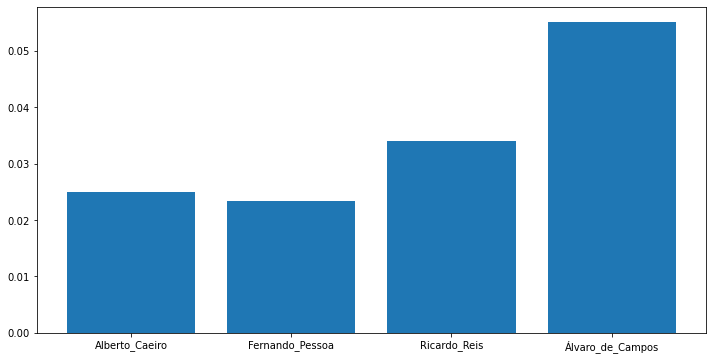

These are the results related to the use of adverbs.
['Alberto_Caeiro', 'Fernando_Pessoa', 'Ricardo_Reis', 'Álvaro_de_Campos']
[0.0311518661518661, 0.06873074238591478, 0.058610623736674104, 0.05102485346768826]


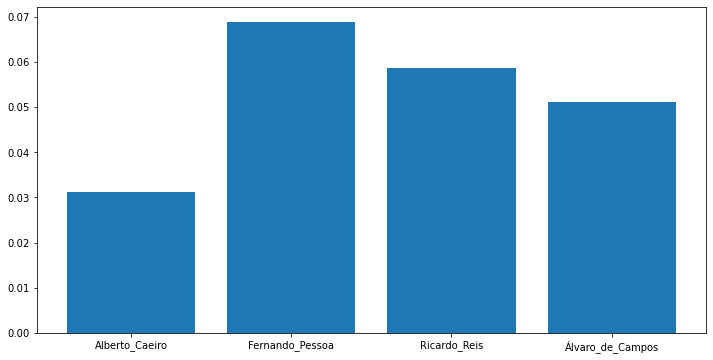

These are the results related to the use of verbs.
['Alberto_Caeiro', 'Fernando_Pessoa', 'Ricardo_Reis', 'Álvaro_de_Campos']
[0.1228442728442728, 0.13909093867714553, 0.1359723376530099, 0.1066585946574584]


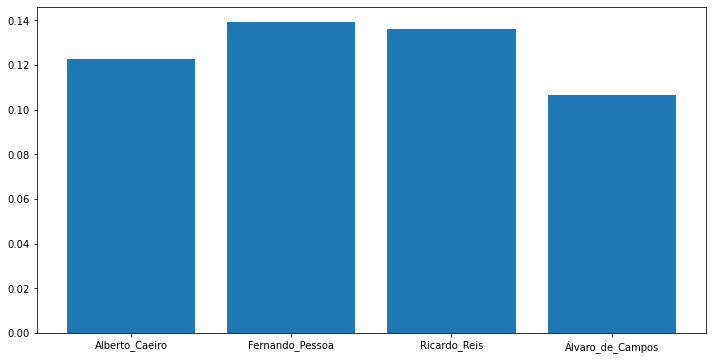

These are the results related to the use of nouns.
['Alberto_Caeiro', 'Fernando_Pessoa', 'Ricardo_Reis', 'Álvaro_de_Campos']
[0.18739382239382235, 0.13173559049421113, 0.17132579527537506, 0.181907605142941]


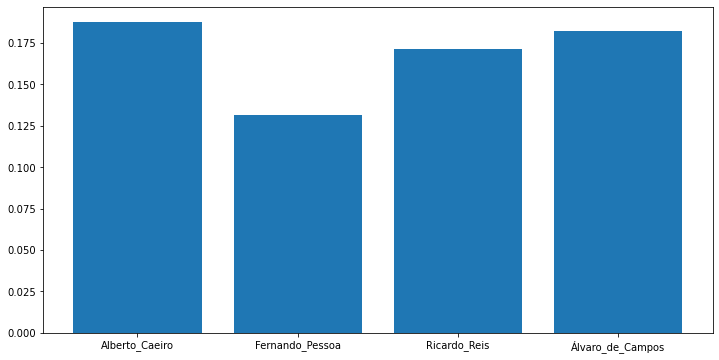

In [21]:
import matplotlib.pyplot as plt

mean_ADJ = data_set.groupby( 'heteronym' )['adjectives'].mean()

print(f"These are the results related to the use of adjectives:")
print( mean_ADJ.index.tolist() ) 
print( mean_ADJ.tolist() )

x_axis = mean_ADJ.index.tolist()
y_axis = mean_ADJ.tolist()

%matplotlib inline

fig = plt.figure( figsize=(12,6) )
ax = plt.axes()

ax.bar( x_axis , y_axis )

plt.show()


mean_ADV = data_set.groupby( 'heteronym' )['adverbs'].mean()

print(f"These are the results related to the use of adverbs.")
print( mean_ADV.index.tolist() ) 
print( mean_ADV.tolist() )

x_axis = mean_ADV.index.tolist()
y_axis = mean_ADV.tolist()

%matplotlib inline

fig = plt.figure( figsize=(12,6) )
ax = plt.axes()

ax.bar( x_axis , y_axis )

plt.show()


mean_VERBS = data_set.groupby( 'heteronym' )['verbs'].mean()

print(f"These are the results related to the use of verbs.")
print( mean_VERBS.index.tolist() ) 
print( mean_VERBS.tolist() )

x_axis = mean_VERBS.index.tolist()
y_axis = mean_VERBS.tolist()

%matplotlib inline

fig = plt.figure( figsize=(12,6) )
ax = plt.axes()

ax.bar( x_axis , y_axis )

plt.show()


mean_NOUN = data_set.groupby( 'heteronym' )['nouns'].mean()

print(f"These are the results related to the use of nouns.")
print( mean_NOUN.index.tolist() ) 
print( mean_NOUN.tolist() )

x_axis = mean_NOUN.index.tolist()
y_axis = mean_NOUN.tolist()

%matplotlib inline

fig = plt.figure( figsize=(12,6) )
ax = plt.axes()

ax.bar( x_axis , y_axis )

plt.show()

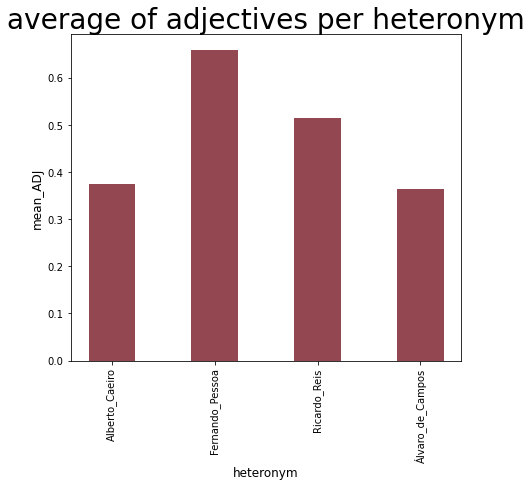

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

mean_ADJ = data_set.groupby( 'heteronym' )['adjectives'].mean()

fig = plt.figure( figsize=( 7 ,6 ) )
ax = plt.axes()


bar_width = 0.45
opacity = 0.8

ax.bar( x_axis , y_axis , width = bar_width, alpha = opacity , color = '#781926')

plt.xticks(rotation= 90)

ax.set_xlabel('heteronym' , fontsize= 12)
ax.set_ylabel('mean_ADJ' , fontsize = 12 )
ax.set_title( 'average of adjectives per heteronym' , fontsize=28 )


plt.show()

In [15]:
colours = []
legendDict = dict()

for index , row in data_set.iterrows():

    if row["heteronym"] == 'Alberto_Caeiro':
        colours.append( '#a88732' )
        legendDict[ colours[index] ] = row["heteronym"]
    elif row["heteronym"] == 'Fernando_Pessoa':
        colours.append( '#265c28' )
        legendDict[ colours[index] ] = row["heteronym"]
    elif row["heteronym"] == 'Ricardo_Reis':
        colours.append( '#a0061a' )
        legendDict[ colours[index] ] = row["heteronym"]
    else:
        colours.append( '#431670' )
        legendDict[ colours[index] ] = row["heteronym"]

In [16]:
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')

plt.figure( figsize = (15,13) )

sns.scatterplot(data = df , x = 'politics' , y= 'religion', hue = 'time', size = 'pain', palette = 'Reds') 

for index, row in df.iterrows():
    plt.text( row['politics'], row['religion'], row['title'], fontsize=12.8)

NameError: name 'sns' is not defined

<Figure size 1080x936 with 0 Axes>

In [ ]:
from tdmh import *
import re
from nltk.tokenize import word_tokenize

for text in files:
    freq_vocabulary = dict()
    freq_pos = dict()
    tagged_words = dict()
    
    print( f'Analysing {get_title(text)} ... ')
    
    path = os.path.normpath(text)
    parts = path.split(os.sep)
    heteronym = parts[1].strip()
    print( f'Heteronym: {heteronym}')
    
    with open( text , encoding = 'utf-8') as poem:
        full_text = poem.read()
        nr_sentences =  0
        nr_tokens = 0 
        
        doc = nlp(full_text)
    
        for sent in doc.sentences:
            nr_sentences += 1
               
            for word in sent.words:
                nr_tokens += 1
                word.text = word.text.lower()
                tagged_words[word.text] = word.upos
                freq_pos[ word.upos ] = freq_pos.get( word.upos ,0) +1
                freq_vocabulary[word.text] = freq_vocabulary.get(word.text,0) + 1
                  
        sentences = sent_tokenize(full_text)
        print( f'The fragment contains { len(sentences) } sentences.\n' )

        for s in sentences:
            print(s + '\n')

In [ ]:
from tdmh import *
import re
from nltk.tokenize import word_tokenize

for text in files:
    freq_vocabulary = dict()
    freq_pos = dict()
    tagged_words = dict()
    
    print( f'Analysing {get_title(text)} ... ')
    
    path = os.path.normpath(text)
    parts = path.split(os.sep)
    heteronym = parts[1].strip()
    print( f'Heteronym: {heteronym}')
    
    with open( text , encoding = 'utf-8') as poem:
        full_text = poem.read()
        nr_sentences =  0
        nr_tokens = 0 
        
        doc = nlp(full_text)
    
        for sent in doc.sentences:
            nr_sentences += 1
               
            for word in sent.words:
                nr_tokens += 1
                word.text = word.text.lower()
                tagged_words[word.text] = word.upos
                freq_pos[ word.upos ] = freq_pos.get( word.upos ,0) +1
                freq_vocabulary[word.text] = freq_vocabulary.get(word.text,0) + 1
        
        words = tokenise(full_text)

        tokens = len(words)
        unique_words = set(words)
        types = len(unique_words)

        ttr = types / tokens

        print( f'Types: {types}' )
        print( f'Tokens: {tokens}' )
        print( f'Type-token ratio: {ttr}' )

In [ ]:
from tdmh import *
import re
from nltk.tokenize import word_tokenize

def remove_punctuation(words):
    new_list= []
    for w in words:
        if w.isalnum():
            new_list.append( w )
    return new_list

def sortedByValue( dict , ascending = False ):
    if ascending: 
        return {k: v for k, v in sorted(dict.items(), key=lambda item: item[1])}
    else:
        return {k: v for k, v in reversed( sorted(dict.items(), key=lambda item: item[1]))}

for text in files:
    freq_vocabulary = dict()
    freq_pos = dict()
    tagged_words = dict()
    freq = dict()
    
    print( f'Analysing {get_title(text)} ... ')
    
    path = os.path.normpath(text)
    parts = path.split(os.sep)
    heteronym = parts[1].strip()
    print( f'Heteronym: {heteronym}')
    
    with open( text , encoding = 'utf-8') as poem:
        full_text = poem.read()
        nr_sentences =  0
        nr_tokens = 0 
        
        doc = nlp(full_text)
    
        for sent in doc.sentences:
            nr_sentences += 1
               
            for word in sent.words:
                nr_tokens += 1
                word.text = word.text.lower()
                tagged_words[word.text] = word.upos
                freq_pos[ word.upos ] = freq_pos.get( word.upos ,0) +1
                freq_vocabulary[word.text] = freq_vocabulary.get(word.text,0) + 1
                
        words = word_tokenize(full_text)
        words = remove_punctuation(words)

        for w in words:
            w = w.lower()
            freq[w] = freq.get( w, 0 ) + 1
         
        for f in sortedByValue( freq ):
            word = 'occurrence'
            if freq[f] > 1:
                word += 's'
                print( f' "{f}" => {freq[f]} {word}' )

In [ ]:
from tdmh import *
import re
from nltk.tokenize import word_tokenize
from nltk.text import Text
import os
import math

def concordance_word( text, regex , width = 10 ):

    concordance = []
    distance = math.floor( width /2 )

    segment_length = 0

    words = word_tokenize( text )
    words = remove_punctuation( words )
    i = 0
    for w in words:
        if re.search( regex , w , re.IGNORECASE ):
            match = ''
            for x in range( i - distance , ( i + distance ) + 1 ):
                if x >= 0 and x < len(words):
                    if len(words[x]) >= 0:
                        match += words[x] + ' '
            concordance.append( match )

        i += 1

    return concordance

def remove_punctuation(words):
    new_list= []
    for w in words:
        if w.isalnum():
            new_list.append( w )
    return new_list

def sortedByValue( dict , ascending = False ):
    if ascending: 
        return {k: v for k, v in sorted(dict.items(), key=lambda item: item[1])}
    else:
        return {k: v for k, v in reversed( sorted(dict.items(), key=lambda item: item[1]))}

for text in files:
    freq_vocabulary = dict()
    freq_pos = dict()
    tagged_words = dict()
    freq = dict()
    
    print( f'Analysing {get_title(text)} ... ')
    
    path = os.path.normpath(text)
    parts = path.split(os.sep)
    heteronym = parts[1].strip()
    print( f'Heteronym: {heteronym}')
    
    with open( text , encoding = 'utf-8') as poem:
        full_text = poem.read()
        nr_sentences =  0
        nr_tokens = 0 
        
        doc = nlp(full_text)
    
        for sent in doc.sentences:
            nr_sentences += 1
               
            for word in sent.words:
                nr_tokens += 1
                word.text = word.text.lower()
                tagged_words[word.text] = word.upos
                freq_pos[ word.upos ] = freq_pos.get( word.upos ,0) +1
                freq_vocabulary[word.text] = freq_vocabulary.get(word.text,0) + 1
                
        words = word_tokenize(full_text)
        words = remove_punctuation(words)
        fragments = concordance_word( full_text , r'como' , 16)

        print( f'There are {len(fragments)} ocurrences of the word "como".')

        number_of_results = 24

        print( f'Here are the first {number_of_results} occurrences:\n\n')
        for f in fragments[:number_of_results]:
            print( f'{f}\n')